In [1]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ TextRank: https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ SentenceEmbedding: https://openreview.net/pdf?id=SyK00v5xx
+ InformationRetrievalAndTextMining: https://github.com/Artificial-Intelligence-for-NLP-Chinese/References/tree/master/information-retrieve


## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答： 新闻摘要提取，汇报文件

##### 提示，如果需要帮助，可以运行以下的提示

In [2]:
# remove the # before hint(), to show the example sulution
hint('a.31.2e.20.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')


1. 搜索引擎；
2. 观点抽取；
3. 新闻；
4. 汇报文档



Q2. 目前的摘要技术分为哪两类？

回答： 提取，重新生成

In [3]:
hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')


摘要 Abstractive: 重新整理信息
抽取 Extractive: 从原文中提取部分



Q3. 目前实现自动摘要的难点在哪里？列出三点。

回答： 缺乏标注数据集，难提取，容错率很低

In [4]:
hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')


1. 缺乏标注训练数据；
2. 基于文本理解，提取重要内容难；
3. 人类对文本逻辑敏感，摘要结果容错率低



## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答：  以page为单位，将的page连接起来，如果某一page所连结的结点越多，我们认为这个page更重要，同时如果某page越重要，那么与它相连接的结点也更重要。

$$PR(p_i) = rac{1-d}{N} + d \sum_{p_j \in M(p_i)}rac{PR (p_j)}{L(p_j)}$$

In [5]:
hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')


1. 方程:
    PR(p_i) = 
rac{1-d}{N} + d \sum_{p_j \in M(p_i)} 
rac{PR (p_j)}{L(p_j)}
2. 参考：
    https://www.wikiwand.com/en/PageRank



Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：基于图的，带权重的，决定因子的重要程度的，排序方法。TextRank是PageRank的一种延申

In [6]:
hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')


参考论文： https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf



Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

回答：可以，训练编码器将输入的原文向量提取出关键的语义，作为解码器的输入；训练的答案是摘要文本的向量。原理就是将LSTM分别作为encoder和decoder来进行信息的提取与还原生成。attention的机制是对encoder的每一个隐藏状态有一个权值的打分评判，分数越高的，说明输出的结果越依赖当前encoder的输入，而让模型达到更加‘注意’这一个输入点的结果。

### 

## Data Pipeline

我们首先加载数据

In [7]:
import pandas as pd
import numpy as np
import jieba
import os
import pandas as pd
from collections import Counter
import numpy as np
from opencc import OpenCC
import jieba
import random
from gensim.models import FastText
from gensim.models.word2vec import LineSentence

def cut(string): return ' '.join(jieba.cut(string))
path_root = 'D:/senior/aiCourse/dataSource/'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [8]:
news_content = pd.read_csv(news_file, encoding='gb18030')
news_content['content'] = news_content['content'].fillna('')


sample = 2000
random_indices = np.random.choice(np.arange(len(news_content['content'])), sample)
sub_data = news_content.iloc[random_indices]

然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 

In [9]:
def load_data():
    pure_file = os.path.join(path_root, 'P3/pureContent.csv')
    if not os.path.exists(pure_file):
        news_file = os.path.join(path_root, 'sqlResult_1558435.csv')
        news_content = pd.read_csv(news_file, encoding='gb18030')
        news_content['content'] = news_content['content'].fillna('')
        pure_content = pd.DataFrame()
        pure_content['content'] = news_content['content']
        pure_content = pure_content.fillna('')
        pure_content['tokenized_content'] = pure_content['content'].apply(cut)
        pure_content.to_csv(pure_file, encoding='gb18030')
    else:
        print('File found! ')
        pure_content = pd.read_csv(pure_file, encoding='gb18030')
        pure_content = pure_content.fillna('')
    return pure_content
pure_content = load_data()

File found! 


# word Vector

In [10]:
def load_model(pure_content):
    model_file = os.path.join(path_root, 'P3/wordmodel_50.model')
    savedContent = os.path.join(path_root, 'P3/all_corpus.txt')

    if not os.path.exists(model_file):
        if not os.path.exists(savedContent):
            with open(savedContent , 'w', encoding='utf-8') as f:
                f.write(' '.join(pure_content['tokenized_content'].tolist()))
        model = FastText(LineSentence(savedContent), workers=8,window=5, size=50, iter=10, min_count=1)
        model.save(model_file)
    else:
        print('model Found!')
        model = FastText.load(model_file)
    return model

model = load_model(pure_content)

model Found!


e:\anaconda\envs\aicourse\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
from functools import reduce

In [12]:
tokeners = [t for l in pure_content['tokenized_content'].tolist() for t in l.split()]

In [13]:
tokeners[:10]

['此外', '，', '自', '本周', '（', '6', '月', '12', '日', '）']

## Counts the words occurence # 

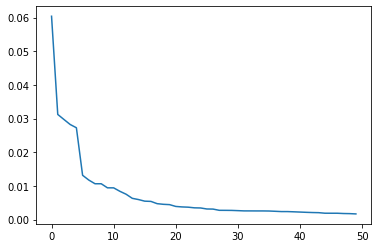

In [14]:
%matplotlib inline
from collections import Counter
tokener_counter = Counter(tokeners)
frequence = {w: count/len(tokeners) for w, count in tokener_counter.items()}
occurences_frequences = sorted(list(frequence.values()), reverse=True)
X = range(len(occurences_frequences))
import matplotlib.pyplot as plt
plt.plot(X[:50], occurences_frequences[:50])

def is_CN_char(ch):
    return ch >= u'\u4e00' and ch <= u'\u9fa5' and ch!='n' and ch!='\n'

def cut(string):
    return list(jieba.cut(string))

def get_stopwords(filename = "D:/senior/aiCourse/dataSource/stop_word.txt"):
    stopwords_dic = open(filename, encoding= 'utf-8')
    stopwords = stopwords_dic.readlines()
    stopwords = [w.strip() for w in stopwords]
    stopwords_dic.close()
    return stopwords

def convert2simple(word):
    openCC = OpenCC('tw2sp')
    return openCC.convert(word)

def clean_sentence(sentence):
    stopwords = get_stopwords()
    sentence = ''.join(filter(is_CN_char,sentence))
    #print(sentence)
    
    
    sentence = convert2simple(sentence)
    words = [w for w in cut(sentence) if len(w)>0 and w not in stopwords]
    #print(words)
    words = ' '.join(words)
    return words  

content = sub_data['content'].apply(clean_sentence)
vocab = ' '.join(content).split()
from wordcloud import WordCloud
wc = WordCloud(
        background_color='white', font_path='D://senior/aiCourse/dataSource/SourceHanSerifSC-Regular.otf'       
    )
worddata = ''.join(sub_data['content'].tolist())
wc.generate_from_text(' '.join(content))
wc.to_file('comment_wc.png')

## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [15]:
import networkx
import random

In [16]:
def genrate_name(length=3):  return ''.join(chr(random.randint(65, 73)) for _ in range(length))

e:\anaconda\envs\aicourse\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


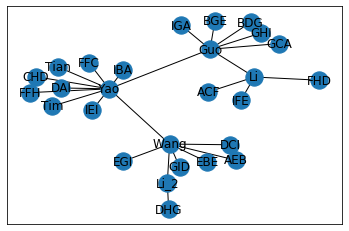

In [17]:
graph = {
    'Yao': ['Guo', 'Wang', 'Tian', 'Tim'] + [genrate_name() for _ in range(6)], 
    'Guo': ['Li'] + [genrate_name() for _ in range(5)], 
    'Wang': ['Li_2'] + [genrate_name() for _ in range(5)], 
    'Li': [genrate_name() for _ in range(3)], 
    'Li_2': [genrate_name() for _ in range(1)]
}
social_network = networkx.graph.Graph()
for vertex, edge in graph.items():
    for v in edge:
        social_network.add_edges_from([(vertex, v)])
networkx.draw_networkx(social_network)

In [18]:
ranking_result = networkx.pagerank(social_network)
sorted(ranking_result.items(), key=lambda x: x[1], reverse=True)

[('Yao', 0.1747698412634544),
 ('Wang', 0.12616099221117885),
 ('Guo', 0.12434209154337311),
 ('Li', 0.07600909782512963),
 ('Li_2', 0.04007465697366682),
 ('DHG', 0.022586982681035123),
 ('IFE', 0.021706946858994478),
 ('FHD', 0.021706946858994478),
 ('ACF', 0.021706946858994478),
 ('EBE', 0.020875426652805028),
 ('AEB', 0.020875426652805028),
 ('EGI', 0.020875426652805028),
 ('DCI', 0.020875426652805028),
 ('GID', 0.020875426652805028),
 ('BDG', 0.020654738077342236),
 ('GHI', 0.020654738077342236),
 ('GCA', 0.020654738077342236),
 ('BGE', 0.020654738077342236),
 ('IGA', 0.020654738077342236),
 ('Tian', 0.020410584159305276),
 ('Tim', 0.020410584159305276),
 ('FFH', 0.020410584159305276),
 ('IBA', 0.020410584159305276),
 ('IEI', 0.020410584159305276),
 ('DAI', 0.020410584159305276),
 ('CHD', 0.020410584159305276),
 ('FFC', 0.020410584159305276)]

In [19]:
networkx.pagerank(social_network)

{'Yao': 0.1747698412634544,
 'Guo': 0.12434209154337311,
 'Wang': 0.12616099221117885,
 'Tian': 0.020410584159305276,
 'Tim': 0.020410584159305276,
 'FFH': 0.020410584159305276,
 'IBA': 0.020410584159305276,
 'IEI': 0.020410584159305276,
 'DAI': 0.020410584159305276,
 'CHD': 0.020410584159305276,
 'FFC': 0.020410584159305276,
 'Li': 0.07600909782512963,
 'BDG': 0.020654738077342236,
 'GHI': 0.020654738077342236,
 'GCA': 0.020654738077342236,
 'BGE': 0.020654738077342236,
 'IGA': 0.020654738077342236,
 'Li_2': 0.04007465697366682,
 'EBE': 0.020875426652805028,
 'AEB': 0.020875426652805028,
 'EGI': 0.020875426652805028,
 'DCI': 0.020875426652805028,
 'GID': 0.020875426652805028,
 'IFE': 0.021706946858994478,
 'FHD': 0.021706946858994478,
 'ACF': 0.021706946858994478,
 'DHG': 0.022586982681035123}

## TextRank page

#### Task 2 使用PageRank 对文本进行关联分析

In [20]:
#hints: 代码可以在Github Group 中看到

In [21]:
lengthes_of_text = map(len, pure_content['content'].tolist())

In [22]:
import matplotlib.font_manager as fm
fp1 = fm.FontProperties(fname="D://senior/aiCourse/dataSource/SourceHanSerifSC-Regular.otf")
def get_connect_graph_by_text_rank(tokenized_text: str, window=3):
    keywords_graph = networkx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [23]:
first_content = pure_content.iloc[1]['tokenized_content']

In [24]:
first_content_continous = pure_content.iloc[4]['content']

In [25]:
first_content_continous.replace(',', ' ').split()

['（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）',
 '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。',
 '那么事发时',
 '到底都发生了些什么呢？',
 '南都记者带您一起还原现场',
 '南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。',
 '刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。',
 '女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。',
 '此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。',
 '现场还原',
 '从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。',
 '当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。',
 '一大清早路上看到这样的情况',
 '恐怕大家都没办法淡定',
 '面对这一情况',
 '刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。',
 '刘青一路上耐心地开导安慰她，但只听到她不

In [26]:
import re
pattern = re.compile('[。，,.]')
token_by_sentence_first = pattern.sub(' ', first_content_continous).split()

In [27]:
token_by_sentence_first[:10]

['（原标题：44岁女子跑深圳约会网友被拒',
 '暴雨中裸身奔走……）',
 '@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身',
 '行走在南坪快速上',
 '期间还起了轻生年头',
 '一辅警发现后赶紧为其披上黄衣',
 '并一路劝说她',
 '那么事发时',
 '到底都发生了些什么呢？',
 '南都记者带您一起还原现场']

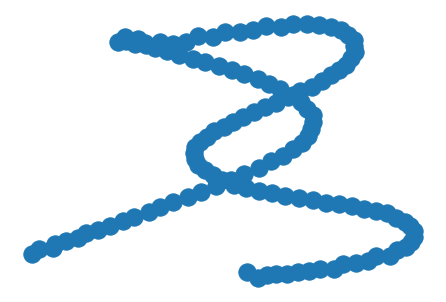

In [28]:
sentence_graph = get_connect_graph_by_text_rank(' '.join(token_by_sentence_first))
networkx.draw(sentence_graph)

In [29]:
ranking_sentence = networkx.pagerank(sentence_graph)

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

In [30]:
#分割句子，将句子按照逗号和句号分隔开。
def split_sentence(sentence):
    pattern = re.compile('[(。\s)！？。.]')
    split = pattern.sub(' ', sentence).split()  # split sentence
    return split

In [31]:
split_sentence('我生气了！ 我不开心。')

['我生气了', '我不开心']

Q7. 如果对切词之后的句子的标点符号进行恢复？

In [32]:
def get_summarization_simple_with_text_rank(text, constraint=200):
    return get_summarization_simple(text, sentence_ranking_by_text_ranking, constraint)


#建立句子和标点符号之间的关系，例如，建立一个字典
def get_summarization_simple(text, score_fn, constraint=200):
    sub_sentence = split_sentence(text)
    ranking_sentence = score_fn(sub_sentence)
    selected_text = set()
    current_text = ''
    
    for sen, _ in ranking_sentence:
        if len(current_text) < constraint:
            current_text += sen
            selected_text.add(sen)
        else:
            break

    summarized = []
    for sen in sub_sentence:  # print the selected sentence by sequent
        if sen in selected_text:
            summarized.append(sen)
    return summarized


def sentence_ranking_by_text_ranking(split_sentence):
    sentence_graph = get_connect_graph_by_text_rank(' '.join(split_sentence))
    ranking_sentence = networkx.pagerank(sentence_graph)
    ranking_sentence = sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)
    return ranking_sentence


sharp_news = pure_content.iloc[8]['content']
'。 '.join(get_summarization_simple_with_text_rank(sharp_news, constraint=250))

'原来他们每天偷偷摸摸干这事。 原来他们每天偷偷摸摸干这事。 大家还记得今年4月光谷曾发生的一件大事吗。 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。 有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。 没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 抢购高峰期，网页打开慢，网银交易出现比较迟钝现象。 有不法分子会冒充客服或店主，以单子出现“调单”“卡单”等说法为幌子，故意说没有收到款项欺诈消费者，取得信任后要求消费者以其他办法进行转账。 识骗方法：消费者要注意，调单、卡单、激活订单等多为诈骗术语，见此类词语基本可以断定对方是骗子。 没有收到款项这样的问题，是不会在东京、天猫这样的大型网络购物平台出现的。 同时，提醒大家：保护好自己账户信息，遇到情况一定及时报警。 武汉破特大网络诈骗案抓808人:以"内幕消息"骗人'

In [33]:
for index in random.sample(list(range(len(pure_content))), 30):
    content = pure_content.iloc[index]['content']
    if len(content) > 1000:
        print('{}----'.format(index))
        print(' '.join(get_summarization_simple_with_text_rank(content, constraint=250)))

8058----
俞正声在致辞中受习近平总书记委托，向第九届海峡论坛的举办表示热烈祝贺，向与会两岸同胞特别是台湾乡亲表示诚挚问候 俞正声指出，去年以来，尽管两岸关系和平发展遭遇严重冲击，面临新的风险和挑战，但两岸交流已经站在新的历史起点上 我们推进两岸民间交流合作、深化两岸经济社会融合发展、造福两岸同胞的决心和态度没有改变 两岸同胞要接过历史的接力棒，坚定维护一个中国原则，深化两岸经济社会融合发展，推进祖国和平统一进程，为实现国家富强、民族复兴、人民幸福贡献力量 中国国民党主席洪秀柱等在发言中表示，作为一个中国人，中华文化是我们的根，两岸和平与合作是现阶段必须追寻的目标
57070----
\n民族地区发展和各族群众生产生活，俞正声一直牵挂在心 在原州区头营镇泉港村，他详细了解移民安置及对口帮扶援建情况，强调要全力为群众排忧解难 在南关街道宋家巷社区，他走进回、汉群众家中问生计、拉家常，勉励各族群众守望相助、和睦相处 在永宁县纳家户清真寺，他与宗教界人士及信教群众亲切交谈，了解清真寺日常管理和宗教活动开展情况 俞正声强调，要认真贯彻落实全国宗教工作会议精神，坚持党的宗教工作基本方针，积极引导宗教与社会主义社会相适应，加强宗教界人士教育培养，不断提高宗教工作水平 要认真总结我国宗教中国化经验，支持宗教界对教义教规作出符合我国国情和时代进步要求的阐释，在社会发展进步中发挥积极作用
55632----
\n\n\n据媒体报道，2010年6月1日，中央储备粮南阳向东直属库光武分库与新野县金硕粮油有限公司签订合同，用于储存中央储备粮，可在近7年的时间里，中储粮“好像把这事忘了”，不派人对这批粮食进行管理，“眼睁睁的看着由二等品变为等外品”，导致粮食变质 \n\n\n对此，中储粮河南省公司购销计划处提供的书面材料表示，万余吨小麦并非被“遗忘”，而是因经济纠纷而导致流通受阻 据介绍，2010年5月，金硕公司将仓库租赁给中储粮南阳直属库光武分库收购托市粮，并于当年收购小麦1 \n\n\n据了解，截至目前，1 6万吨仓储小麦已移库6600吨，拍卖出库4450吨，移库工作还在执行中


In [34]:
sorted(ranking_sentence.items(), key=lambda x: x[1], reverse=True)

[('一名女子言语不清', 0.008761809701694283),
 ('行走在南坪快速上', 0.008761809701694281),
 ('期间还起了轻生年头', 0.00853806788025346),
 ('淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话', 0.00853806788025346),
 ('一辅警发现后赶紧为其披上黄衣', 0.008371719895408159),
 ('去年6月7号上午', 0.008371719895408159),
 ('并一路劝说她', 0.008245759268329758),
 ('女方从20岁到50岁不等', 0.008245759268329758),
 ('那么事发时', 0.00815029910456809),
 ('男子迷奸网友拍418个视频', 0.00815029910456809),
 ('@SJ-李赫海i：这个交警很暖有木有！', 0.008078401421739694),
 ('到底都发生了些什么呢？', 0.008078401421739692),
 ('南都记者带您一起还原现场', 0.008024087516959199),
 ('@Tomchlee：蜀黍帅！', 0.008024087516959199),
 ('南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警）', 0.007983207314774927),
 ('@中華云盾：警察……警察就是群众最需时申出援手', 0.007983207314774927),
 ('一位外表高大帅气', 0.007952624377193676),
 ('@火心聆听心灵：点赞交警', 0.007952624377193674),
 ('说话略带些腼腆的90后青年', 0.007929884597094566),
 ('同时也感谢交警蜀黍', 0.007929884597094566),
 ('刘青介绍', 0.007913142240506744),
 ('想想自己的家人', 0.007913142240506744),
 ('@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？', 0.007900964870248895),
 ('6月16日早上7时36分', 0.00790096487024889

In [35]:
keywords_graph = get_connect_graph_by_text_rank(first_content, window=5)

In [36]:
ranking_words = networkx.pagerank(keywords_graph)

e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 39553 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 39553 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0, flags=flags)
e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\anaconda\envs\aicourse\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20026 missing from

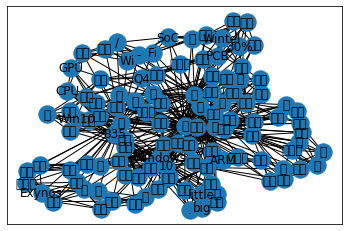

In [37]:
from matplotlib import rcParams
rcParams['font.family'] = 'D://senior/aiCourse/dataSource/SourceHanSerifSC-Regular.otf'
networkx.draw_networkx(keywords_graph)

In [38]:
sorted(ranking_words.items(), key=lambda x: x[1], reverse=True)[:10]

[('，', 0.04971796909107254),
 ('的', 0.032169208603727614),
 ('。', 0.02860228225909264),
 ('、', 0.02771502328849811),
 ('骁龙', 0.017759850248184172),
 ('Windows', 0.015115542829056361),
 ('10', 0.014661459543306039),
 ('835', 0.01417195081727616),
 ('桌面', 0.013938442660657342),
 ('平台', 0.012843338290542764)]

#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:句子向量能够和词向量起到相同的功能，衡量句子之间的相似程度。

In [39]:
hint('a.53e5.5b50.5411.91cf.80fd.591f.8861.91cf.53e5.5b50.4e4b.95f4.7684.76f8.4f3c.5ea6.ff0c.6545.800c.53ef.4ee5.901a.8fc7.8be5.65b9.6cd5.5224.65ad.67d0.4e2a.53e5.5b50.662f.5426.548c.6587.672c.542b.4e49.76f8.5173.a')


句子向量能够衡量句子之间的相似度，故而可以通过该方法判断某个句子是否和文本含义相关



#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：

第一步，将句子里所有的词向量都乘以一个权重，这个权重是（a）/（a+frequency），其中a是一个常数；然后把所有的词向量相加，得到一个简单的句向量。

第二步：将所有的句向量减去他们在句向量矩阵的主成分U的投影，有点类似PCA，然后得到的就是该句子的句向量。

优点：快，无监督，性能好，运算简单

In [40]:
hint('a.63d0.793a.ff1a.9891.7387.ff0c.91cd.8981.6027.ff0c.5feb.901f.ff0c.6027.80fd.597d.a')


提示：频率，重要性，快速，性能好



Q10. embedding是什么？ 用数学的方式解释embedding。

回答：将数据中个体原本之间的关系能够在低维空间上表示，同时能够用数学的方法来保留这些个体之间的相互关系

In [41]:
hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')


提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持



Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：用户、商品。对于之间的关系描述性非常强，更加准确。

In [42]:
hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')


例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 



Q12. 这种embedding的方法和tfidf有何异同？ 

回答：tf-idf通过计算某个单字在一段文字中出现的频率，与在全部文档中出现的频率，来计算这个词出现的频率，通常用来表示这个词对于一段文字的重要程度； embedding方法是计算这个词上下文中的词出现的概率，通过这个矩阵来表示这个词的语义。

In [43]:
hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')


提示：tfidf考虑的频率其 tf 和 idf 分别是什么？ 该embedding的频率类似于什么？ 



Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答: 省略、随机值、古德-图灵法

In [44]:
hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')


开发型问题，可以省略，可以赋予随机值，可以给一特定值，具体情况需要经过试验进行分析



Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：计算两个矩阵的余弦距离

In [45]:
hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')


cosine， 余弦距离



Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

 回答：

In [46]:
hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')


提示：请参考word2vec训练时候的的概率分布的定义，可以看到其loss当时优化的就是 exp(v1 . v2), 那么当 v1 . v2最大的时候，
就是这两个向量方向一致的时候，所以，该词向量在训练的时候的loss的衡量，就是依据方向进行的。 



In [47]:
hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')


另外，也不是不能用欧几里得，但是依据上一提示之分析，欧几里得是不能很好保持语义相似性的。 



Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：cosine只考虑“方向“是否一样

In [48]:
hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

cosine只考虑“方向“是否一样


In [49]:
#先将所有的词向量都乘以一个常数alpha，然后将它们相加，之后再通过PCA提取他们的句向量

def sentence_embedding(sentence, cut=cut):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-4
    
    global frequence
    
    max_fre = max(frequence.values())
    
    words = cut(sentence).split()
    
    sentence_vec = np.zeros_like(model.wv['测试'])
    
    words = [w for w in words if w in model]
    
    for w in words:
        weight = alpha / (alpha + frequence.get(w, max_fre))
        sentence_vec += weight * model.wv[w]
    
    sentence_vec /= len(words)
    # Skip the PCA
    return sentence_vec


In [50]:
from scipy.spatial.distance import cosine
from functools import partial
def get_corrlations(text, cut_fn):
    if isinstance(text, list): text = ' '.join(text)
        
    sub_sentences = split_sentence(text)
    sentence_vector = sentence_embedding(text, cut_fn)
        
    correlations = {}
    
    for sub_sentence in sub_sentences:
        sub_sen_vec = sentence_embedding(sub_sentence, cut_fn)
        correlation = cosine(sentence_vector, sub_sen_vec)
        correlations[sub_sentence]= correlation

    return sorted(correlations.items(), key=lambda x: x[1], reverse=True)

In [51]:
corrlations_with_global_cut = partial(get_corrlations, cut_fn=cut)


In [52]:
def get_summarization_simple_by_sen_embedding(text, constraint=200):
    return get_summarization_simple(text, corrlations_with_global_cut, constraint)

In [53]:
corrlations = get_corrlations(sharp_news, cut)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Andywong\AppData\Local\Temp\jieba.cache
Loading model cost 0.570 seconds.
Prefix dict has been built succesfully.
e:\anaconda\envs\aicourse\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


In [59]:
sharp_news

'（原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！\r\n大家还记得今年4月光谷曾发生的一件大事吗？\r\n当时微博和朋友圈上都传疯了，\r\n说是光谷国际广场大量白领被捕！\r\n现场手铐都不够用！\r\n结果经记者深入调查后发现，\r\n这些被抓的并不是网传的“白领”\r\n而是一个有282名涉案人员的诈骗团伙！\r\n天呐！接近300人的犯罪团伙，\r\n你以为这个数字已经够庞大了吗？\r\n错，还有让你更震惊的！！\r\n据武汉市公安局通报：\r\n6月9日，警方在武汉三镇的10处窝点内，\r\n抓获了808名嫌疑人！\r\n而且令人大跌眼镜的是，\r\n他们当中大多都是年青人，\r\n用“俊男靓女”来形容也不为过！\r\n年纪不大，外形不差，那么到底是犯了什么事呢？\r\n其实说起来，这事估计绝大多数人都碰到过！那就是网络诈骗！\r\n涉案电脑800余台、手机2000余部、\r\n银行卡3000余张....\r\n因为涉及的账户太多，\r\n涉案金额目前还没统计出来。\r\n这是全国涉案人数最多的一起特大网络诈骗案！\r\n这些惊人的数字背后，究竟藏着什么样的秘密？警方把他们一锅端了！\r\n今年4月，武汉警方获悉在塔子湖地区有电信网络诈骗活动，经过2个多月的秘密侦查，发现了一个特大网络诈骗犯罪团伙。\r\n原来该团伙利用非法互联网金融平台，实施推荐股票、炒期货等诈骗，其10处窝点散布在江岸、洪山、东湖高新、硚口、江汉等5个区的写字楼内，涉案人员多达800余名！\r\n6月9日上午，武汉警方组织了1000余名警力，分成14个抓捕组，同时对首脑分子和10处窝点实施了突击抓捕行动！\r\n目前，警方已依法刑事拘留411人，对45人取保候审。该案还在进一步调查中。\r\n他们是如何进行诈骗的？\r\n人数众多的这个诈骗组织是怎么样进行人员分工？又是如何一步步引受害人上钩的呢？\r\n2015年以来，该犯罪团伙以投资组建的某集团公司为总部，旗下成立多家分公司、子公司，设立人事部、财务部、行政部等机构部门，分为经理、分析师、业务小组长、业务员等组织层级。\r\n在网上发布招聘信息招揽、培训业务员\r\n依托虚构的互联网金融平台，通过业务员散布“有内幕消

In [54]:
corrlations

[('）', 1.130783572793007),
 ('4', 1.100191369652748),
 ('5', 1.0819260776042938),
 ('6', 1.077786274254322),
 ('1', 1.0763503164052963),
 ('2', 1.073316715657711),
 ('The-former-degrees：', 1.0680594444274902),
 ('3', 1.0387866906821728),
 ('a一元复始c：', 0.9343020394444466),
 ('刑法守望者：', 0.89299276471138),
 ('z_路漫漫：', 0.8596546649932861),
 ('蒋妈妈1', 0.7754957377910614),
 ('天呐', 0.7335845232009888),
 ('俗话说，知己知彼百战不殆', 0.7192385196685791),
 ('霖心金鱼And张蒙：', 0.7047199904918671),
 ('这尼玛是让我骗人啊', 0.682900458574295),
 ('说是光谷国际广场大量白领被捕', 0.6693127751350403),
 ('据武汉市公安局通报：', 0.6616958379745483),
 ('而且令人大跌眼镜的是，', 0.6350645124912262),
 ('抓获了808名嫌疑人', 0.6335879862308502),
 ('6月9日，警方在武汉三镇的10处窝点内，', 0.6242031157016754),
 ('目前，警方已依法刑事拘留411人，对45人取保候审', 0.6119232475757599),
 ('进了一个星期发现不太对劲', 0.5889772474765778),
 ('6月9日上午，武汉警方组织了1000余名警力，分成14个抓捕组，同时对首脑分子和10处窝点实施了突击抓捕行动',
  0.5778388381004333),
 ('冉冉的彗星是个宝：早上还接到说做期货', 0.5690303146839142),
 ('小编只有一个感觉：', 0.5665955245494843),
 ('?赶紧自己跑路了', 0.5548296570777893),
 ('

In [55]:
sharp_news = pure_content.iloc[6]['content']
'。 '.join(get_summarization_simple_by_sen_embedding(sharp_news, constraint=200))

e:\anaconda\envs\aicourse\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  app.launch_new_instance()


'2013。 年退出中国市场，但是今年。 3。 又会是怎么样的手机呢。 FS8016。 的夏普神秘新机悄然出现在。 GeekBench。 的跑分库上。 660。 4GB。 660。 14。 纳米工艺，八个。 Kryo。 260。 核心设计，集成。 Adreno。 512。 GPU。 和。 X12。 LTE。 调制解调器。 660。 R11。 660。 820。 不过，由于。 与高通签署了排他性协议，可以独占两三个月时间。 660。 新品了。 2013。 EDGEST。 302SH。 28。 在。 5。 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12。 个月之后，在座的各位手机都会换掉。 ”'

In [56]:
def get_sequent_correlation(text):
    sub_sentence = split_sentence(text)
    #corrleations = corrlations_with_global_cut(sub_sentence)
    correlation_with_sequent = [cosine(sen, corrlations[sen]) for sen in sub_sentence]
    return correlation_with_sequent

In [57]:
sub_sentence = get_sequent_correlation(sharp_news)
sub_sentence

TypeError: list indices must be integers or slices, not str

In [ ]:
plt.plot(range(len(sub_sentence)), [y for _, y in correlation_with_sequent])

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD



In [ ]:
def compute_pc(X,npc=1):
    svd = TruncatedSVD(n_components=1, n_iter=7, random_state=0)
    svd.fit(X)
    return svd.components_

def remove_pc(X, npc=1):
    """
    Remove the projection on the principal components
    :param X: X[i,:] is a data point
    :param npc: number of principal components to remove
    :return: XX[i, :] is the data point after removing its projection
    """
    pc = compute_pc(X, npc)
    if npc==1:
        XX = X - X.dot(pc.transpose()) * pc
    else:
        XX = X - X.dot(pc.transpose()).dot(pc)
    return XX

def SIF_embedding(We, x, w, params):
    """
    Compute the scores between pairs of sentences using weighted average + removing the projection on the first principal component
    :param We: We[i,:] is the vector for word i
    :param x: x[i, :] are the indices of the words in the i-th sentence
    :param w: w[i, :] are the weights for the words in the i-th sentence
    :param params.rmpc: if >0, remove the projections of the sentence embeddings to their first principal component
    :return: emb, emb[i, :] is the embedding for sentence i
    """
    emb = get_weighted_average(We, x, w)
    if  params.rmpc > 0:
        emb = remove_pc(emb, params.rmpc)
    return emb

def get_cos(v1, v2):
    return cosine(v1, v2)

In [ ]:
sub_vector = remove_pc(np.array(X))[1]

In [ ]:
from scipy.spatial.distance import cosine
minCOS=10
minCount=0
for i,item in enumerate(X):
    if minCOS>get_cos(item,all_vector):
        minCOS=get_cos(item,all_vector)
        minCount=i

In [ ]:
sub_content[i]

In [ ]:
sharp_news

In [ ]:
remove_pc(np.array([sentence_embedding("这是一个测试"),sentence_embedding("我觉得你不应该这样子"),sentence_embedding("但那又怎么样呢"),sentence_embedding("那就再来一个测试吧")]))

#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [ ]:
hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')

## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [ ]:
hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')

### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

In [ ]:
hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')

### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。